## Daily simulation circuit

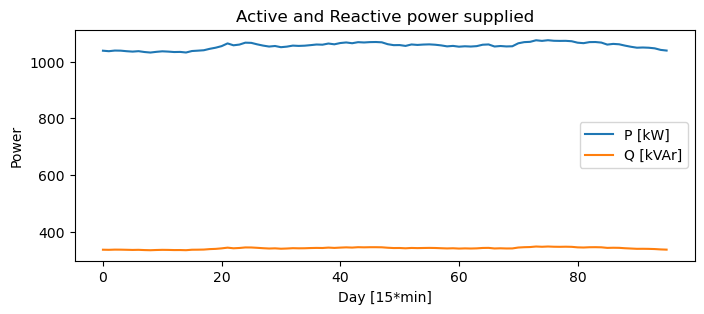

In [7]:
import dssMonitor
import matplotlib.pyplot as plt

pathPQ = "./dssfiles/CKT_Mon_subestacionpq_1.csv"
pathVI = "./dssfiles/CKT_Mon_subestacionvi_1.csv"
monitor_Data = dssMonitor.dssData()

# Substation data
PQ_data = monitor_Data.monitor_PQ(pathPQ, L=3)
VI_data = monitor_Data.monitor_VI(pathVI, T=4)
P_kW = [p for p, _ in PQ_data]
Q_kVAr = [q for _, q in PQ_data]
Va = [a[0][0] for a, _ in VI_data]
Vb = [b[1][0] for b, _ in VI_data]
Vc = [c[2][0] for c, _ in VI_data]
Vn = [n[3][0] for n, _ in VI_data]

# Plot: Power
plt.figure(figsize=(8, 3))
plt.plot(P_kW)
plt.plot(Q_kVAr)
plt.title("Active and Reactive power supplied")
plt.xlabel("Day [15*min]")
plt.ylabel("Power")
plt.legend(("P [kW]", "Q [kVAr]"))
plt.show()


In [ ]:
# Plot: Voltage magnitud
plt.figure(figsize=(8, 3))
plt.plot(Va, label = "Va")
plt.plot(Vb, label = "Vb")
plt.plot(Vc, label = "Vc")
plt.plot(Vn, label = "Vn")
plt.title("Voltage for each phase")
plt.xlabel("Day [15*min]")
plt.ylabel("Voltage magnitud")
plt.legend()
plt.show()